In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/Alphabet/A_Z Handwritten Data.csv')
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
X = df.drop('0',axis=1)
y = df['0']

In [6]:
y.value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: 0, dtype: int64

In [7]:
X.shape

(372450, 784)

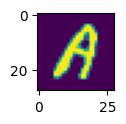

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(X.iloc[0].values.reshape(28,28))

In [9]:
X = X/255

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y.shape

(372450,)

In [12]:
y = to_categorical(y,num_classes=26)
y.shape

(372450, 26)

In [13]:
X.shape

(372450, 784)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 30)                1230      
                                                                 
 dense_3 (Dense)             (None, 26)                806       
                                                                 
Total params: 43,326
Trainable params: 43,326
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X,y,epochs=10,batch_size=64)

Epoch 1/10
5820/5820 [==============================] - 13s 2ms/step - loss: 0.1323 - accuracy: 0.9685
Epoch 2/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1329 - accuracy: 0.9684
Epoch 3/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1338 - accuracy: 0.9687
Epoch 4/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1334 - accuracy: 0.9687
Epoch 5/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1362 - accuracy: 0.9681
Epoch 6/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1345 - accuracy: 0.9683
Epoch 7/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1354 - accuracy: 0.9687
Epoch 8/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1361 - accuracy: 0.9684
Epoch 9/10
5820/5820 [==============================] - 12s 2ms/step - loss: 0.1378 - accuracy: 0.9683
Epoch 10/10
5820/5820 [==============================] - 12s 2ms/step - l

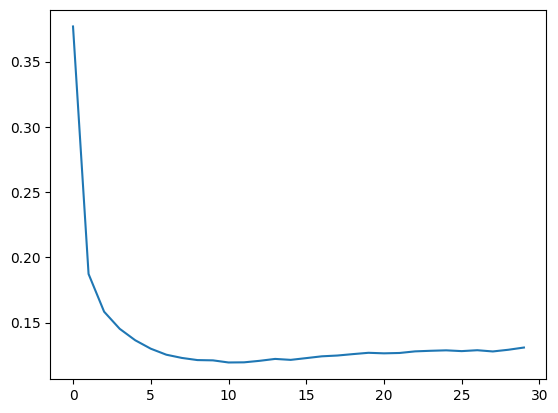

In [19]:
plt.plot(hist.history['loss'])

In [20]:
img = X.iloc[372445].values.reshape(1,784)
model.predict_on_batch(img).argmax()

25

In [21]:
df['0']

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64